In [1]:
import tensorflow as tf

# 從官方範例資料集下載 MNIST
mnist = tf.keras.datasets.mnist

# x_train:訓練圖片資料, y_train:訓練圖片答案
# x_test:測試圖片資料, y_test:測試圖片答案
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 因為圖片介於0~255(越亮越大)，所以除以255，使資料介於0~1之間
# 歸一化有提升收斂速度及提升模型精度的作用
x_train, x_test = x_train / 255.0, x_test / 255.0

0
60000


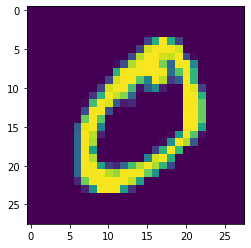

In [3]:
import matplotlib.pyplot as plt


# 印出答案y_train[1]
print(y_train[1])

print(len(x_train)) #training data 總共有60000張圖片

# 印出圖片x_train[1]
plt.imshow(x_train[1])

# x_train[0]為28個有28個數字的一陣列    
# 1,2,3...28
# 2
# 3
# .
# .
# 28

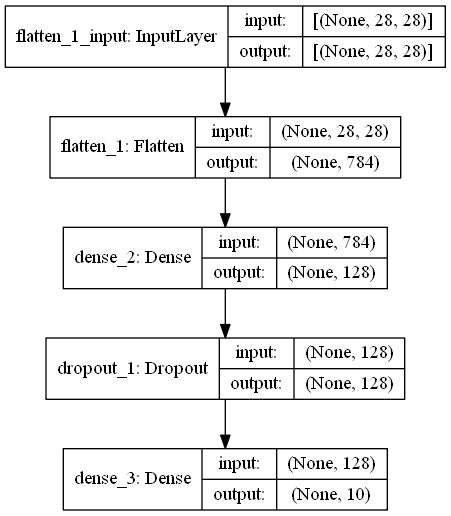

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

# 用Sequential建立模型
ANN = keras.Sequential(name='ClassifcationANN')

# 拉平成28*28
ANN.add(layers.Flatten(input_shape=(28, 28)))

# 用relu來收斂
ANN.add(layers.Dense(128, activation='relu'))

# Dropout 是一種對抗過擬合的正則化方法，以一定的機率丟棄隱藏層神經元來對抗過擬合
ANN.add(layers.Dropout(0.2))

# 希望她出去的是機率
ANN.add(layers.Dense(10, activation='softmax')) 
keras.utils.plot_model(ANN,show_shapes=True)


# 打印出模型的信息
#ANN.summary()

In [6]:
# model每層定義好後需要經過compile
# optimizer最佳化工具為adam
# 方法為loss的sparse_categorical_crossentropy
ANN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])





# 訓練網路用fix
# x_train去跟y_train比，迭代五次
# History.history 属性是一个记录了连续迭代的训练/验证（如果存在）损失值和评估值的字典
# verbose：日志显示，0为不在标准输出流输出日志信息，1为输出进度条记录，2为每个epoch输出一行记录
# validation_split：0~1之间的浮点数，用来指定训练集的一定比例数据作为验证集。验证集将不参与训练，并在每个epoch结束后测试的模型的指标，如损失函数、精确度等。注意，validation_split的划分在shuffle之前，因此如果你的数据本身是有序的，需要先手工打乱再指定validation_split，否则可能会出现验证集样本不均匀。
# validation_data：形式为（X，y）的tuple，是指定的验证集。此参数将覆盖validation_spilt
history = ANN.fit(x_train, y_train,validation_split=0.25,epochs=5)

Epoch 1/5
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5365 - accuracy: 0.8433 - val_loss: 0.1763 - val_accuracy: 0.9486
Epoch 2/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1662 - accuracy: 0.9517 - val_loss: 0.1312 - val_accuracy: 0.9592
Epoch 3/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1210 - accuracy: 0.9647 - val_loss: 0.1053 - val_accuracy: 0.9676
Epoch 4/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0971 - accuracy: 0.9700 - val_loss: 0.0990 - val_accuracy: 0.9713
Epoch 5/5
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0811 - accuracy: 0.9744 - val_loss: 0.0941 - val_accuracy: 0.9735


In [7]:
import numpy as np


predics = ANN.predict(x_test)
# 抓到x_test的第[]張照片的比對結果，並把結果印出至小數點第3位
print(np.round(predics[0],3))

# shape為顯示矩陣長度
predics.shape

[0.    0.    0.    0.001 0.    0.    0.    0.999 0.    0.   ]


(10000, 10)

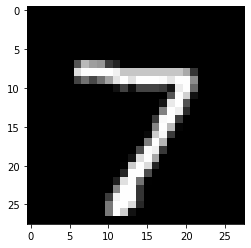

In [9]:
# 以灰階印出[]照片，用來看看訓練結果如何(個視圖之間最好不要同時打印，否則會有吃圖bug)
# 或是用subplot分圖
plt.imshow(x_test[0],cmap='gray')

In [10]:
# 用predict_classes把[]中的最適結果印出來
predicLabels = ANN.predict_classes(x_test)
print('prelabel:',predicLabels[0])

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


prelabel: 7


In [11]:
# evaluate() 用於評估已經過訓練的模型。返回模型的損失值&指標值
# 損失函數即實際值和預測值的殘差所以越小越好
ANN.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0839 - accuracy: 0.9738


[0.08394259959459305, 0.973800003528595]

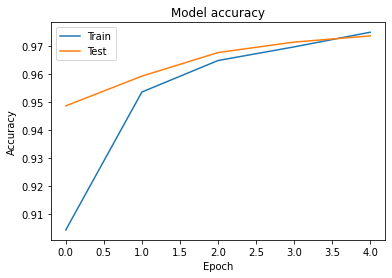

In [12]:
# 绘制训练 & 验证的准确率值
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

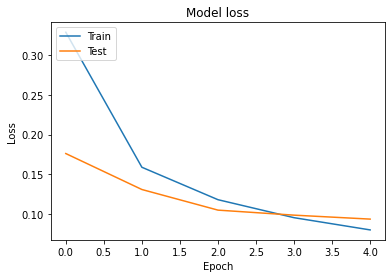

In [13]:
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()